## Topic and basic principle of filtering
* A low-pass filter will "pass" (or keep) low frequency components of a signal and attenuate high frequency components
* A high-pass will do the opposite - it will pass high frequencies and attenuate low frequency components
* Implementation steps:
    * Build a filter in the time or frequency domain
        * if built in time domain, then FFT it to get a frequency domain representation
        * then FFT the time domain signal that you want to filter (and retain complex values - not just the amplitude)
        * then multiply the FFT'd filter by the FFT'd timeseries
        * then iFFT the filtered signal back into the time domain

## Example application - CA+ imaging data analysis... 

https://pubmed.ncbi.nlm.nih.gov/27375930/

![ca+ imaging](ca_imaging.jpg)

## Imports

In [12]:
import numpy as np
from numpy import pi  #np.pi
import matplotlib.pyplot as plt

In [10]:
def do_fft( sig, dt ):
    
    '''
    FFT a time domain signal
    
    Inputs: 
        sig: time doman signal
        dt: time step
    
    Outputs:
        amp: amp of FFT
        cplx: complex valued output of the FFT
        freq_x: frequ resolution for plotting...
    
    '''
    
    cplx = np.fft.rfft( sig )
    
    amp = np.abs( cplx )
    
    #norm amp
    amp = ( amp / len(sig) ) * 2
    
    # freq resolution...
    freq_x = np.fft.rfftfreq( len( sig ), dt )
    
    return amp, cplx, freq_x
    

In [13]:
Lf = 1
Hf = 16

frequs = np.arange(Lf, Hf+1)
print(frequs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


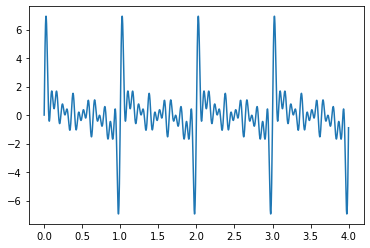

In [57]:
# seed random number generator
np.random.seed( 0 )

sr = 512  # Hz
tmax = 4  # s
dt = 1 / sr # time step...
t = np.arange(0 , tmax, dt)   # time range to eval functions...

sig = np.zeros( len(t) )

for f in np.arange( len(frequs) ):
    sig += np.random.rand() * np.sin( 2*pi*frequs[f]*t )

plt.plot(t, sig)
plt.show()

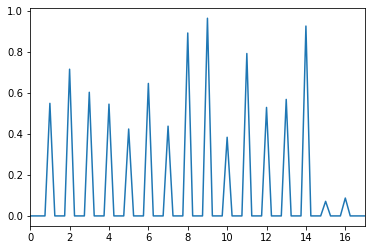

0.25

In [58]:
# do fft
amp, cplx, freq_x = do_fft( sig, dt )

plt.plot(freq_x, amp)
plt.xlim([0, Hf+1])
plt.show()
freq_x[1] - freq_x[0]

## low pass filter (idealized) - brick wall filter

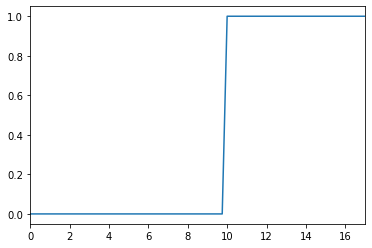

In [42]:
lp_cut = 5

cut_pnt = np.flatnonzero( freq_x == lp_cut )[0]

lp_filt = np.zeros( len(freq_x) )

lp_filt[40:] = 1

plt.plot(freq_x, lp_filt)
plt.xlim([0, Hf+1])
plt.show()


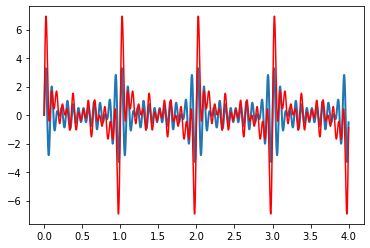

In [44]:
# implement the filter...
filt_data = cplx * lp_filt

filt_data = np.fft.irfft( filt_data )

plt.plot(t, filt_data, linewidth = 2)
plt.plot(t, sig, 'r')
plt.show()


In [56]:
%%writefile my_brick_filt.py

import numpy as np

def define_filt(fx, filt_freq, type_filt):
    
    '''
    fx = freq axis
    filt_freq = cutoff point in freq space
    type_filt = 'lp' or 'hp'
    
    '''

    cut_pnt = np.flatnonzero( fx == filt_freq )[ 0 ]
    
    brick = np.zeros( len(fx) )
    
    if type_filt == 'lp':
        brick[0:cut_pnt] = 1
        
    elif type_filt == 'hp':
        brick[cut_pnt:] = 1
        
    else:
        raise ValueError('You passed in bad input for type_filt (lp or hp)')
        
    return brick


def apply_filt(input_sig, filt):
    
    '''
    input_sig = time domain signal to filter
    filt = brick wall filter (output of define_filt)
    '''
    
    fft_sig = np.fft.rfft( input_sig )
    
    return np.fft.irfft(fft_sig * filt)
    
    
    

Overwriting my_brick_filt.py


In [52]:
%cat my_brick_filt.py


import numpy as np

def define_filt(fx, filt_freq, type_filt):
    
    '''
    fx = freq axis
    filt_freq = cutoff point in freq space
    type_filt = 'lp' or 'hp'
    
    '''

    cut_pnt = np.flatnonzero( fx == filt_freq )[ 0 ]
    
    brick = np.zeros( len(fx) )
    
    if type_filt == 'lp':
        brick[0:cut_pnt] = 1
        
    elif type_filt == 'hp':
        brick[cut_pnt:] = 1
        
    else:
        raise ValueError('You passed in bad input for type_filt (lp or hp)')
        
    return brick


def apply_filt(input_sig, filt):
    
    '''
    input_sig = time domain signal to filter
    filt = brick wall filter (output of define_filt)
    '''
    
    fft_sig = np.fft.rfft( input_sig )
    
    return np.fft.irfft(fft_sig * filt)
    
    
    


In [48]:
import my_brick_filt as mbf

In [ ]:
mbf.define_filt()
mbf.apply_filt()

In [8]:
x

10